In [1]:
from one.api import ONE
one = ONE(mode='remote')

In [33]:
# Find sessions from subject KS023
# sess = list(one.search(project='brainwide', datasets='_ibl_leftCamera.features.pqt'))
sess = list(one.search(project='brainwide', task_protocol='ephys', datasets='_ibl_wheel.position.npy'))
print(len(sess))
eid = sess[450]

485


In [34]:
one.get_details(eid)

{'subject': 'DY_010',
 'lab': 'danlab',
 'projects': 'ibl_neuropixel_brainwide_01',
 'task_protocol': '_iblrig_tasks_ephysChoiceWorld6.2.5',
 'number': 1,
 'start_time': '2020-01-23T14:35:49.539303',
 'url': 'https://openalyx.internationalbrainlab.org/sessions/90d1e82c-c96f-496c-ad4e-ee3f02067f25',
 'local_path': PosixALFPath('/Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_010/2020-01-23/001'),
 'date': datetime.date(2020, 1, 23)}

In [42]:
one.list_datasets(eid=sess[500], query_type='remote')

['alf/_ibl_trials.table.pqt']

In [44]:
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
datasets = one.list_datasets(eid)
datasets

['alf/#2023-04-20#/_ibl_leftCamera.times.npy',
 'alf/#2023-04-20#/_ibl_rightCamera.times.npy',
 'alf/#2023-04-20#/licks.times.npy',
 'alf/_ibl_leftCamera.dlc.pqt',
 'alf/_ibl_leftCamera.features.pqt',
 'alf/_ibl_passiveGabor.table.csv',
 'alf/_ibl_passivePeriods.intervalsTable.csv',
 'alf/_ibl_passiveRFM.times.npy',
 'alf/_ibl_passiveStims.table.csv',
 'alf/_ibl_rightCamera.dlc.pqt',
 'alf/_ibl_rightCamera.features.pqt',
 'alf/_ibl_trials.goCueTrigger_times.npy',
 'alf/_ibl_trials.stimOff_times.npy',
 'alf/_ibl_trials.table.pqt',
 'alf/_ibl_wheel.position.npy',
 'alf/_ibl_wheel.timestamps.npy',
 'alf/_ibl_wheelMoves.intervals.npy',
 'alf/_ibl_wheelMoves.peakAmplitude.npy',
 'alf/leftCamera.ROIMotionEnergy.npy',
 'alf/leftROIMotionEnergy.position.npy',
 'alf/probe00/electrodeSites.brainLocationIds_ccf_2017.npy',
 'alf/probe00/electrodeSites.localCoordinates.npy',
 'alf/probe00/electrodeSites.mlapdv.npy',
 'alf/probe00/pykilosort/#2024-05-06#/_ibl_log.info_pykilosort.log',
 'alf/probe00/

In [36]:
one.list_datasets?

Signature:
one.list_datasets(
    eid=None,
    filename=None,
    collection=None,
    revision=None,
    qc=<QC.FAIL: 40>,
    ignore_qc_not_set=False,
    details=False,
    query_type=None,
    default_revisions_only=False,
    keep_eid_index=False,
) -> Union[numpy.ndarray, pandas.core.frame.DataFrame]
Docstring:
Given an eid, return the datasets for those sessions.

If no eid is provided, a list of all datasets is returned.  When details is false, a sorted
array of unique datasets is returned (their relative paths).

Parameters
----------
eid : str, UUID, pathlib.Path, dict
    Experiment session identifier; may be a UUID, URL, experiment reference string
    details dict or Path.
filename : str, dict, list
    Filters datasets and returns only the ones matching the filename.
    Supports lists asterisks as wildcards.  May be a dict of ALF parts.
collection : str, list
    The collection to which the object belongs, e.g. 'alf/probe01'.
    This is the relative path of the file fr

In [36]:
# import session loader
from brainbox.io.one import SessionLoader

In [37]:
# instantiate session loader
sess_loader = SessionLoader(one=one, eid=eid)

In [38]:
# Load in trials data
sess_loader.load_trials()

(S3) /Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subj
(S3) /Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subj
(S3) /Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subj


In [39]:
df = sess_loader.trials

In [40]:
df.columns

Index(['goCueTrigger_times', 'stimOff_times', 'rewardVolume', 'contrastRight',
       'contrastLeft', 'goCue_times', 'firstMovement_times', 'probabilityLeft',
       'feedbackType', 'choice', 'response_times', 'stimOn_times',
       'feedback_times', 'intervals_0', 'intervals_1'],
      dtype='object')

In [47]:
df[['contrastLeft', 'contrastRight', 'choice', 'feedbackType']].head()
df[['goCue_times', 'stimOn_times', 'response_times', 'feedback_times']].head()

,goCue_times,stimOn_times,response_times,feedback_times
0,92.288337,92.373695,92.504810,92.504915
1,97.257273,97.256607,97.561736,97.561810
2,100.068892,100.068159,100.318343,100.318434
3,102.957503,102.956570,103.187642,103.187747
4,105.935472,105.934705,106.214959,106.215777


In [21]:
df['contrastLeft'].unique()

array([0.125 , 0.0625, 0.25  , 1.    ,    nan, 0.    ])

In [43]:
prob_left = df['probabilityLeft']

Text(0, 0.5, 'probability')

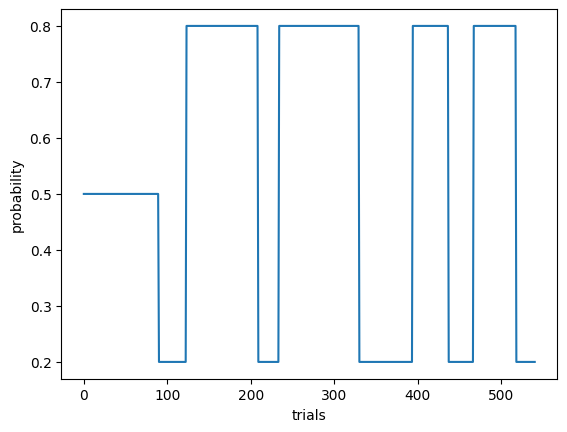

In [44]:
import matplotlib.pyplot as plt
plt.plot(prob_left)
plt.xlabel('trials')
plt.ylabel('probability')

In [45]:
sess_loader.load_wheel()

(S3) /Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subj
(S3) /Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subj


In [46]:
sess_loader.wheel

,times,position,velocity,acceleration
0,0.255008,-0.001534,0.000000,0.000000
1,0.256008,-0.001527,0.007285,7.284842
2,0.257008,-0.001521,0.007260,-0.024393
3,0.258008,-0.001514,0.007229,-0.031414
4,0.259008,-0.001507,0.007192,-0.037452
...,...,...,...,...
4038209,4038.464111,33.923622,0.011440,-1.975636
4038210,4038.465088,33.923698,0.009671,-1.768656
4038211,4038.466064,33.923775,0.008102,-1.569706
4038212,4038.467041,33.923855,0.006721,-1.380532
